## Amazon Reviews Classification

In [1]:
import csv
import fasttext
import pandas as pd
from sklearn.metrics import roc_auc_score

In [2]:
train_data = open('train.ft.txt')
train_data = train_data.readlines()
train_data = [x.encode('utf-8') for x in train_data]
train_data = pd.DataFrame(train_data)
train_data.to_csv('training.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
train_data[1:3]

,0
1,"b""__label__2 The best soundtrack ever to anyth..."
2,b'__label__2 Amazing!: This soundtrack is my f...


In [3]:
model = fasttext.train_supervised('train.ft.txt',label_prefix='__label__', thread=4, epoch = 10)

In [4]:
model.labels

['__label__1', '__label__2']

In [5]:
model.save_model("text_classification.bin")

In [6]:
test_data = open('test.ft.txt')
test_data = test_data.readlines()
test_data = [x.replace('\n', '') for x in test_data]
new_test_data = [w.replace('__label__2 ', '') for w in test_data]
new_test_data = [w.replace('__label__1 ', '') for w in new_test_data]

In [7]:
# Use the predict function 
pred = model.predict(new_test_data)

# check the first record outputs
print(pred[0][0], 'is the predicted label')
print(pred[0][1], 'is the probability score')

['__label__2'] is the predicted label
['__label__2'] is the probability score


In [8]:
# Lets recode the actual targets to 1's and 0's from both the test set and the actual predictions  
labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_data]
pred_labels = [0 if x == ['__label__1'] else 1 for x in pred[0]]

# run the accuracy measure. 
print(roc_auc_score(labels, pred_labels))


0.9173825000000001


In [9]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn.metrics as metrics

In [10]:
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

/home/asmaa/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass normalize=
 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy:  0.9173825
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    200000
           1       0.92      0.92      0.92    200000

    accuracy                           0.92    400000
   macro avg       0.92      0.92      0.92    400000
weighted avg       0.92      0.92      0.92    400000



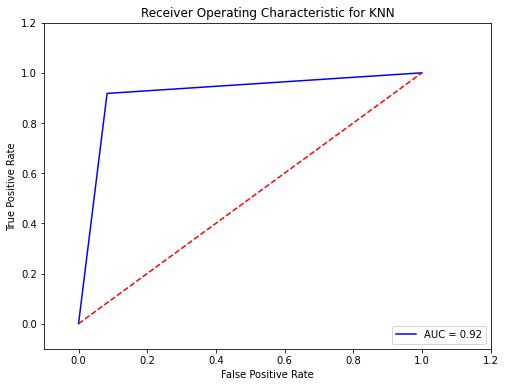

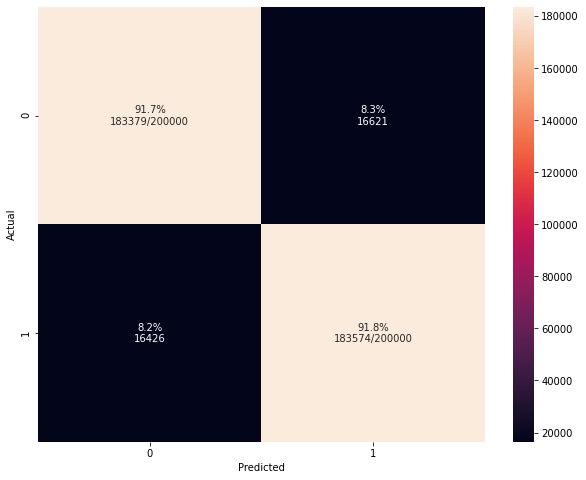

In [11]:
print('Accuracy: ', metrics.accuracy_score(labels, pred_labels, '\n'))
print(metrics.classification_report(labels, pred_labels))

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(labels, pred_labels)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('\n')

cm_analysis(labels, pred_labels, 'Confusion.PNG', [0, 1], ymap=None, figsize=(10,8))